In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
import pickle

with open("./train.p",mode='rb') as train_data:
    train = pickle.load(train_data)
with open("./valid.p",mode='rb') as valid:
    validation = pickle.load(valid)
with open("./test.p",mode='rb') as test_data:
    test = pickle.load(test_data)

In [3]:
X_train, y_train = train['features'],train['labels']
X_valid, y_valid = validation['features'],validation['labels']
X_test, y_test = test['features'],test['labels']

In [4]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [5]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [6]:
X_train_norm = (X_train_gray - 128) / 128
X_valid_norm = (X_valid_gray - 128) / 128
X_test_norm = (X_test_gray - 128) / 128

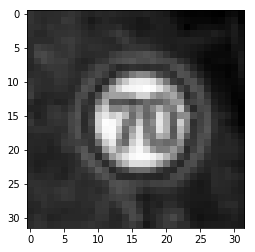

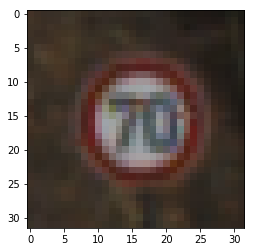

In [7]:
plt.imshow(X_valid_gray[1000].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_valid[1000])

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\Anaconda3\envs\ori-env\lib\si

In [9]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size =(5,5), 
               activation = 'relu',input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size =(5,5), 
               activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'softmax'))


In [10]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [11]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [12]:
hist = cnn_model.fit(X_train_norm,
              y_train,
              batch_size = 500,
              nb_epoch = 5,
              verbose = 2,
              validation_data = (X_valid_norm,y_valid) )

C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 34799 samples, validate on 4410 samples
Epoch 1/5
 - 18s - loss: 3.1898 - acc: 0.1746 - val_loss: 2.7387 - val_acc: 0.2644
Epoch 2/5
 - 16s - loss: 1.7645 - acc: 0.5105 - val_loss: 1.6713 - val_acc: 0.5152
Epoch 3/5
 - 17s - loss: 1.0768 - acc: 0.6861 - val_loss: 1.2507 - val_acc: 0.6193
Epoch 4/5
 - 16s - loss: 0.7827 - acc: 0.7731 - val_loss: 1.0082 - val_acc: 0.7084
Epoch 5/5
 - 15s - loss: 0.6118 - acc: 0.8260 - val_loss: 0.9196 - val_acc: 0.7356


In [13]:
cnn_model.evaluate(X_test_norm,y_test)

12630/12630 [==============================] - 2s 132us/step


[1.1187423013262776, 0.7258907363703585]

In [14]:
hist.history.keys()

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])

5


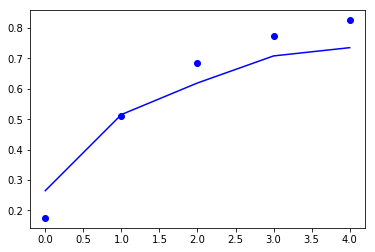

In [16]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']
loss = hist.history['loss']

epochs = range(len(acc))
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = cnn_model.predict_classes(X_test_norm)
cm = confusion_matrix(y_test,y_pred)

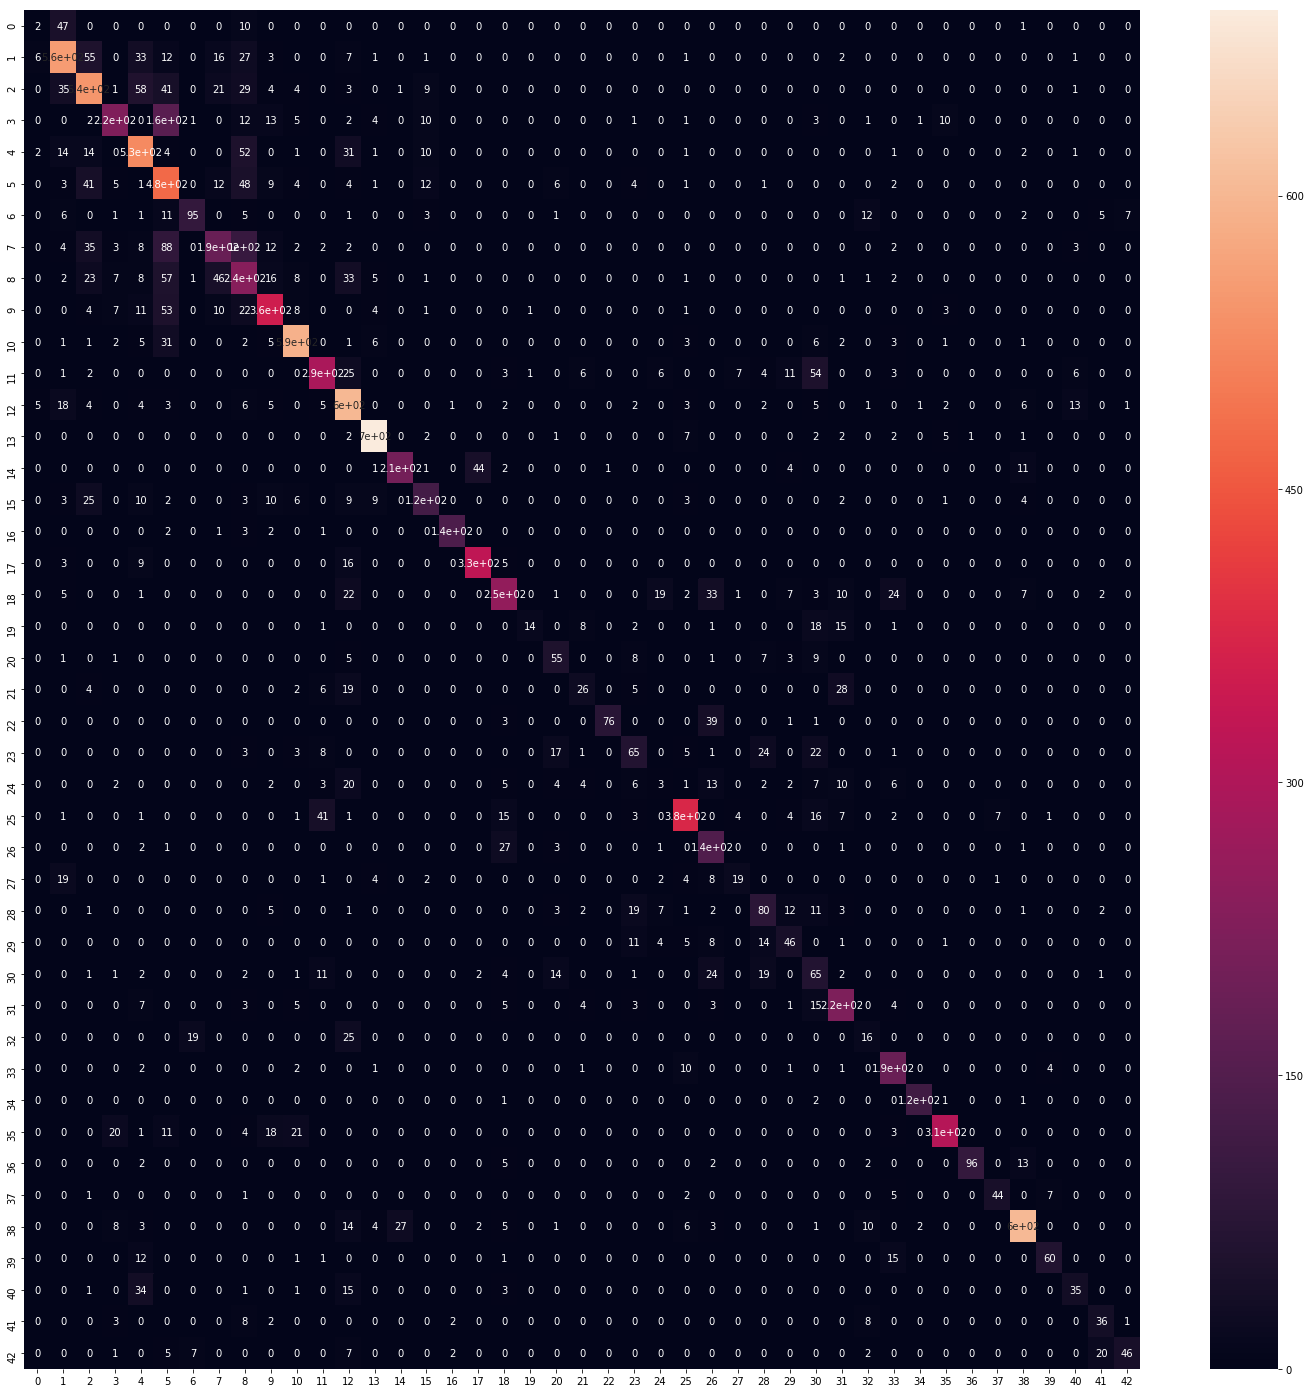

In [19]:
plt.figure(figsize= (25,25))
sns.heatmap(cm,annot= True)

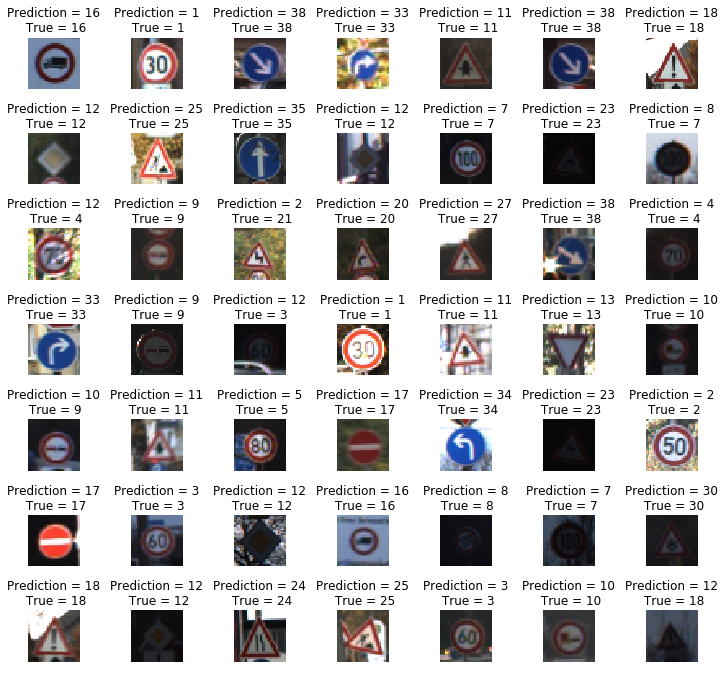

In [22]:
L=7
W=7
fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction = {}\n True = {}".format(y_pred[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)